In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("population_by_country_2020.csv")
df

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4991,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3458,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1624,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1354,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [3]:
df.rename(columns={'Country (or dependency)': 'Country',
                   'Population (2020)': 'Population',
                   "Density (P/Km²)": "Density"}, inplace=True)

Text(0.5, 1.0, 'Top 10 des pays avec la population la plus élévé')

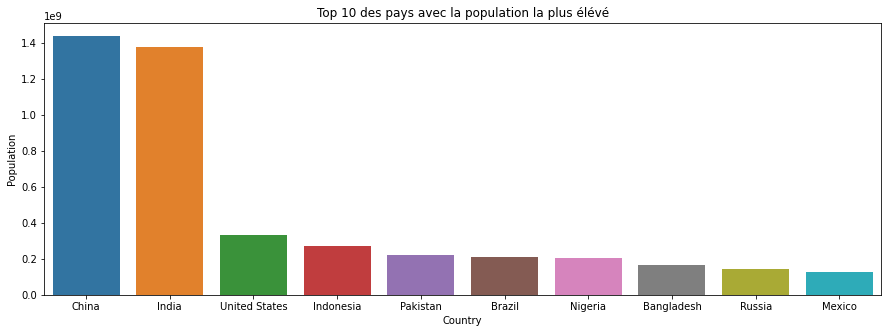

In [4]:
data = df[["Country", "Population"]].copy().nlargest(10, columns=["Population"]) # obtenir le top 10 des pays avec la population la plus élévée

fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="Country", y="Population", ax=ax, data=data).set_title("Top 10 des pays avec la population la plus élévé")

In [5]:
data = pd.merge(data,df[['Country','Density','Yearly Change', 'Med. Age']],on='Country', how='left')

Text(0.5, 1.0, 'visualition de la densité de la population par pays pour les 10 pays avec la population la plus élévé')

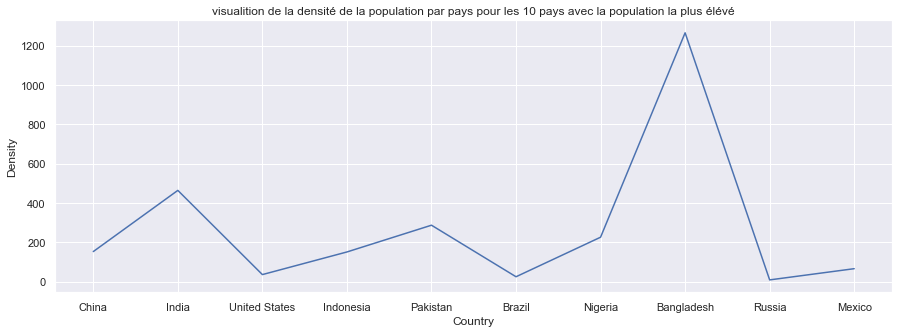

In [6]:
sns.set_theme(style="darkgrid")
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x="Country", y="Density", ax=ax, data=data).set_title("visualition de la densité de la population par pays pour les 10 pays avec la population la plus élévé")

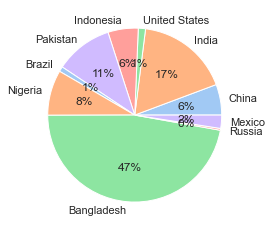

In [7]:
#define data
data1 = data.Density
labels = data.Country

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data1, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Text(0.5, 1.0, "Taux d'augmentation de la population entre 2019 et 2020 dans le top 10 des pays avec la population la plus élévé")

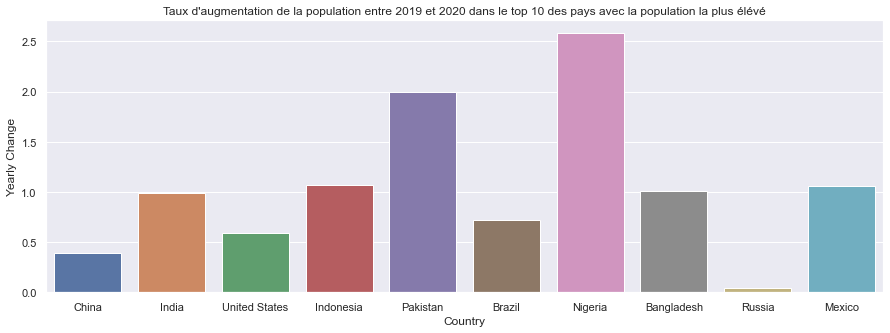

In [8]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
data["Yearly Change"] = data["Yearly Change"].str.replace("%", "")
data["Yearly Change"] =  data["Yearly Change"].astype(float)

sns.barplot(x="Country", y="Yearly Change", ax=ax, data=data).set_title("Taux d'augmentation de la population entre 2019 et 2020 dans le top 10 des pays avec la population la plus élévé")

In [ ]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
data["Med. Age"] = data["Med. Age"].fillna(0).astype("int")
sns.barplot(x="Country", y="Med. Age", ax=ax, data=data).set_title("moyenne d'age dans le top 10 des pays avec la population la plus élévé")

Text(0.5, 1.0, "moyenne d'age dans le top 10 des pays avec la population la plus élévé")

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(y=data["Yearly Change"], x=data['Med. Age'])